# Product Category Prediction - Analysis & Modeling

This notebook covers the exploratory data analysis (EDA), data cleaning, feature engineering, and model comparison for the product category prediction task.

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

%matplotlib inline

## 1. Load Data

In [18]:
df = pd.read_csv('../data/products.csv')
df.head()

,product ID,Product Title,Merchant ID,Category Label,_Product Code,Number_of_Views,Merchant Rating,Listing Date
0,1,apple iphone 8 plus 64gb silver,1,Mobile Phones,QA-2276-XC,860.0,2.5,5/10/2024
1,2,apple iphone 8 plus 64 gb spacegrau,2,Mobile Phones,KA-2501-QO,3772.0,4.8,12/31/2024
2,3,apple mq8n2b/a iphone 8 plus 64gb 5.5 12mp sim...,3,Mobile Phones,FP-8086-IE,3092.0,3.9,11/10/2024
3,4,apple iphone 8 plus 64gb space grey,4,Mobile Phones,YI-0086-US,466.0,3.4,5/2/2022
4,5,apple iphone 8 plus gold 5.5 64gb 4g unlocked ...,5,Mobile Phones,NZ-3586-WP,4426.0,1.6,4/12/2023


## 2. Exploratory Data Analysis (EDA)

In [19]:
print(f"Total records: {len(df)}")
print(f"Missing values:\n{df.isnull().sum()}")

Total records: 35311
Missing values:
product ID           0
Product Title      172
Merchant ID          0
 Category Label     44
_Product Code       95
Number_of_Views     14
Merchant Rating    170
 Listing Date       59
dtype: int64


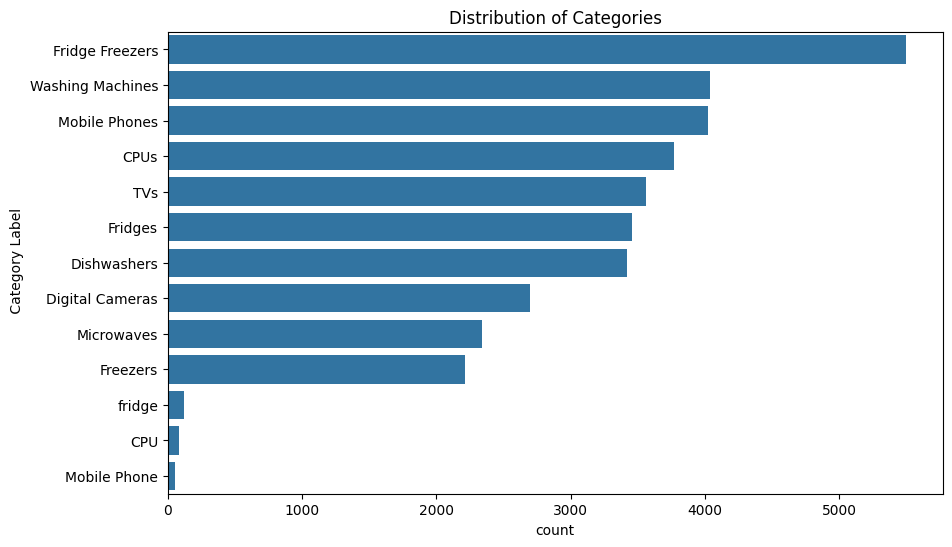

In [20]:
plt.figure(figsize=(10,6))
sns.countplot(y=' Category Label', data=df, order = df[' Category Label'].value_counts().index)
plt.title('Distribution of Categories')
plt.show()

## 3. Data Cleaning & Feature Engineering

In [21]:
df = df.dropna(subset=['Product Title', ' Category Label'])
df['Title Length'] = df['Product Title'].apply(len)
df.head()

,product ID,Product Title,Merchant ID,Category Label,_Product Code,Number_of_Views,Merchant Rating,Listing Date,Title Length
0,1,apple iphone 8 plus 64gb silver,1,Mobile Phones,QA-2276-XC,860.0,2.5,5/10/2024,31
1,2,apple iphone 8 plus 64 gb spacegrau,2,Mobile Phones,KA-2501-QO,3772.0,4.8,12/31/2024,35
2,3,apple mq8n2b/a iphone 8 plus 64gb 5.5 12mp sim...,3,Mobile Phones,FP-8086-IE,3092.0,3.9,11/10/2024,70
3,4,apple iphone 8 plus 64gb space grey,4,Mobile Phones,YI-0086-US,466.0,3.4,5/2/2022,35
4,5,apple iphone 8 plus gold 5.5 64gb 4g unlocked ...,5,Mobile Phones,NZ-3586-WP,4426.0,1.6,4/12/2023,54


## 4. Model Training & Comparison

In [22]:
X = df['Product Title']
y = df[' Category Label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

tfidf = TfidfVectorizer(stop_words='english')
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [23]:
models = {
    'Naive Bayes': MultinomialNB(),
    'Linear SVC': LinearSVC(),
    'Random Forest': RandomForestClassifier(n_estimators=100)
}

for name, model in models.items():
    model.fit(X_train_tfidf, y_train)
    y_pred = model.predict(X_test_tfidf)
    print(f"--- {name} ---")
    print(classification_report(y_test, y_pred))


--- Naive Bayes ---
                  precision    recall  f1-score   support

             CPU       0.00      0.00      0.00        14
            CPUs       0.98      1.00      0.99       726
 Digital Cameras       0.99      1.00      0.99       535
     Dishwashers       0.99      0.96      0.97       684
        Freezers       1.00      0.52      0.68       422
 Fridge Freezers       0.76      0.98      0.86      1087
         Fridges       0.89      0.82      0.85       702
      Microwaves       0.99      0.97      0.98       464
    Mobile Phone       0.00      0.00      0.00        17
   Mobile Phones       0.98      0.99      0.98       795
             TVs       0.98      0.99      0.99       724
Washing Machines       0.98      0.98      0.98       821
          fridge       0.00      0.00      0.00        29

        accuracy                           0.93      7020
       macro avg       0.73      0.71      0.71      7020
    weighted avg       0.93      0.93      0.92   

c:\Users\disco\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\disco\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\disco\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(ave

--- Linear SVC ---
                  precision    recall  f1-score   support

             CPU       0.00      0.00      0.00        14
            CPUs       0.98      1.00      0.99       726
 Digital Cameras       0.99      1.00      0.99       535
     Dishwashers       0.93      0.96      0.95       684
        Freezers       0.98      0.94      0.96       422
 Fridge Freezers       0.96      0.94      0.95      1087
         Fridges       0.89      0.93      0.91       702
      Microwaves       0.99      0.97      0.98       464
    Mobile Phone       0.00      0.00      0.00        17
   Mobile Phones       0.97      0.99      0.98       795
             TVs       0.97      0.99      0.98       724
Washing Machines       0.96      0.97      0.96       821
          fridge       0.00      0.00      0.00        29

        accuracy                           0.96      7020
       macro avg       0.74      0.74      0.74      7020
    weighted avg       0.95      0.96      0.96    

c:\Users\disco\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\disco\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\disco\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(ave

--- Random Forest ---
                  precision    recall  f1-score   support

             CPU       0.00      0.00      0.00        14
            CPUs       0.98      0.99      0.99       726
 Digital Cameras       0.99      0.99      0.99       535
     Dishwashers       0.93      0.95      0.94       684
        Freezers       0.94      0.89      0.91       422
 Fridge Freezers       0.94      0.92      0.93      1087
         Fridges       0.84      0.91      0.88       702
      Microwaves       0.99      0.97      0.98       464
    Mobile Phone       0.00      0.00      0.00        17
   Mobile Phones       0.97      0.98      0.97       795
             TVs       0.98      0.99      0.98       724
Washing Machines       0.94      0.95      0.95       821
          fridge       0.00      0.00      0.00        29

        accuracy                           0.95      7020
       macro avg       0.73      0.73      0.73      7020
    weighted avg       0.94      0.95      0.94 